In [1]:
import pandas as pd

df = pd.read_csv("/Users/vancescadinh/Documents/AI/ai-projects/tech-jobs-market-ai/tech-jobs-market-ai/ingestion/adzuna_jobs.csv")
df= df.apply(lambda col: col.str.lower() if col.dtype == "object" else col)
df.sample(5)

,id,job_id,company_display_name,location,title,latitude,longitude,redirect_url,description,category_tag,contract_time,created
2897,3261,5500284123,mediahuis,antwerpen,business analyst,51.225428,4.371243,https://www.adzuna.be/land/ad/5500284123?se=ga...,mediahuis is looking for a business analyst t...,unknown,NaN,2025-11-17t14:12:36z
4903,5473,5265584497,movilitas,"steenokkerzeel, halle-vilvoorde",technical architect,50.910260,4.512700,https://www.adzuna.be/details/5265584497?utm_m...,"for our european digital manufacturing team, w...",unknown,NaN,2025-06-24t13:17:39z
2566,2908,5506196972,european safety maintenance scrl,belgië,spécialiste erp odoo (h/f/x),NaN,NaN,https://www.adzuna.be/land/ad/5506196972?se=3t...,european safety maintenance (esm) sc agréée co...,unknown,NaN,2025-11-20t22:26:59z
4071,4559,5437744173,akkodis,belgië,sustainability engineer - life sciences - m/v/x,NaN,NaN,https://www.adzuna.be/details/5437744173?utm_m...,general information publication date 07/10/202...,scientific-qa-jobs,full_time,2025-10-08t21:22:07z
605,743,5534600046,smals,belgië,head of it development,NaN,NaN,https://www.adzuna.be/land/ad/5534600046?se=si...,smals realiseert innovatieve ict-projecten in ...,it-jobs,NaN,2025-12-09t14:59:00z


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5038 entries, 0 to 5037
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5038 non-null   int64  
 1   job_id                5038 non-null   int64  
 2   company_display_name  5037 non-null   object 
 3   location              5038 non-null   object 
 4   title                 5038 non-null   object 
 5   latitude              1776 non-null   float64
 6   longitude             1776 non-null   float64
 7   redirect_url          5038 non-null   object 
 8   description           5038 non-null   object 
 9   category_tag          5038 non-null   object 
 10  contract_time         1244 non-null   object 
 11  created               5038 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 472.4+ KB


In [4]:
import re

en_job_title = ["data", "analyst", "engineer", "learning", "analytics", "intelligence", "nlp", "computer vision", "software", "devops"]
nl_job_title = ["analist", "ingenieur"]
fr_job_title = ["données", "analyste", "ingénieur"]
other_job_title = ["mlops", "software"]

all_languages_job_title = en_job_title + nl_job_title + fr_job_title + other_job_title

pattern = r"(?:{})".format("|".join(re.escape(job) for job in all_languages_job_title))

mask = df["title"].str.contains(pattern, case=False, na=False)
matches = df[mask]
matches.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1604 entries, 0 to 5036
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1604 non-null   int64  
 1   job_id                1604 non-null   int64  
 2   company_display_name  1604 non-null   object 
 3   location              1604 non-null   object 
 4   title                 1604 non-null   object 
 5   latitude              537 non-null    float64
 6   longitude             537 non-null    float64
 7   redirect_url          1604 non-null   object 
 8   description           1604 non-null   object 
 9   category_tag          1604 non-null   object 
 10  contract_time         353 non-null    object 
 11  created               1604 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 162.9+ KB


In [13]:
matches

,id,job_id,company_display_name,location,title,latitude,longitude,redirect_url,description,category_tag,contract_time,created
0,1,5532749858,johnson & johnson,belgië,"sr director, head of data science & digital he...",NaN,NaN,https://www.adzuna.be/details/5532749858?utm_m...,"at johnson & johnson, we believe health is eve...",unknown,full_time,2025-12-07t21:14:34z
1,2,5532749786,bjak,belgië,founding ai engineer,NaN,NaN,https://www.adzuna.be/details/5532749786?utm_m...,"transform language models into real-world, hig...",it-jobs,full_time,2025-12-07t21:14:31z
2,3,5532129711,house of hr,belgië,data & ai engineer,NaN,NaN,https://www.adzuna.be/details/5532129711?utm_m...,about our team the data & ai team plays a cent...,unknown,NaN,2025-12-07t06:47:39z
3,4,5531941061,bv enersee,"antwerpen, antwerpen (provincie)",data engineer ai,NaN,NaN,https://www.adzuna.be/details/5531941061?utm_m...,enersee is growing fast. we’re scaling to the ...,energy-oil-gas-jobs,NaN,2025-12-07t01:26:45z
5,6,5531806375,johnson and johnson,"beerse, turnhout","sr director, head of data science & digital he...",51.31981,4.85645,https://www.adzuna.be/details/5531806375?utm_m...,"at johnson & johnson, we believe health is eve...",pr-advertising-marketing-jobs,full_time,2025-12-06t23:48:43z
...,...,...,...,...,...,...,...,...,...,...,...,...
5010,5593,5195206035,it labs,belgië,software development engineer in test (sdet),NaN,NaN,https://www.adzuna.be/details/5195206035?utm_m...,our client is a top-tier data solutions compan...,other-general-jobs,full_time,2025-05-12t20:45:17z
5017,5602,5188352311,scholt energy,"waregem, kortrijk",sales engineer sustainability,50.88650,3.43209,https://www.adzuna.be/details/5188352311?utm_m...,"job description ben jij analytisch sterk, heb ...",unknown,full_time,2025-05-08t12:57:25z
5020,5605,5182976624,agad technology,belgië,senior fullstack software engineer (.net / azu...,NaN,NaN,https://www.adzuna.be/details/5182976624?utm_m...,job description we're hiring: senior fullstack...,other-general-jobs,full_time,2025-05-06t13:58:29z
5021,5606,5182906536,akkodis,belgië,qc analyst,NaN,NaN,https://www.adzuna.be/details/5182906536?utm_m...,general information category operations - engi...,unknown,full_time,2025-05-06t12:54:36z


In [5]:
filter_matches = matches.copy()
filter_matches["company_name_clean"] = (filter_matches["company_display_name"].str.replace(" ", "_", regex=False).str.replace("&", "and", regex=False))
filter_matches

,id,job_id,company_display_name,location,title,latitude,longitude,redirect_url,description,category_tag,contract_time,created,company_name_clean
0,1,5532749858,johnson & johnson,belgië,"sr director, head of data science & digital he...",NaN,NaN,https://www.adzuna.be/details/5532749858?utm_m...,"at johnson & johnson, we believe health is eve...",unknown,full_time,2025-12-07t21:14:34z,johnson_and_johnson
1,2,5532749786,bjak,belgië,founding ai engineer,NaN,NaN,https://www.adzuna.be/details/5532749786?utm_m...,"transform language models into real-world, hig...",it-jobs,full_time,2025-12-07t21:14:31z,bjak
2,3,5532129711,house of hr,belgië,data & ai engineer,NaN,NaN,https://www.adzuna.be/details/5532129711?utm_m...,about our team the data & ai team plays a cent...,unknown,NaN,2025-12-07t06:47:39z,house_of_hr
3,4,5531941061,bv enersee,"antwerpen, antwerpen (provincie)",data engineer ai,NaN,NaN,https://www.adzuna.be/details/5531941061?utm_m...,enersee is growing fast. we’re scaling to the ...,energy-oil-gas-jobs,NaN,2025-12-07t01:26:45z,bv_enersee
5,6,5531806375,johnson and johnson,"beerse, turnhout","sr director, head of data science & digital he...",51.31981,4.85645,https://www.adzuna.be/details/5531806375?utm_m...,"at johnson & johnson, we believe health is eve...",pr-advertising-marketing-jobs,full_time,2025-12-06t23:48:43z,johnson_and_johnson
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5010,5593,5195206035,it labs,belgië,software development engineer in test (sdet),NaN,NaN,https://www.adzuna.be/details/5195206035?utm_m...,our client is a top-tier data solutions compan...,other-general-jobs,full_time,2025-05-12t20:45:17z,it_labs
5017,5602,5188352311,scholt energy,"waregem, kortrijk",sales engineer sustainability,50.88650,3.43209,https://www.adzuna.be/details/5188352311?utm_m...,"job description ben jij analytisch sterk, heb ...",unknown,full_time,2025-05-08t12:57:25z,scholt_energy
5020,5605,5182976624,agad technology,belgië,senior fullstack software engineer (.net / azu...,NaN,NaN,https://www.adzuna.be/details/5182976624?utm_m...,job description we're hiring: senior fullstack...,other-general-jobs,full_time,2025-05-06t13:58:29z,agad_technology
5021,5606,5182906536,akkodis,belgië,qc analyst,NaN,NaN,https://www.adzuna.be/details/5182906536?utm_m...,general information category operations - engi...,unknown,full_time,2025-05-06t12:54:36z,akkodis


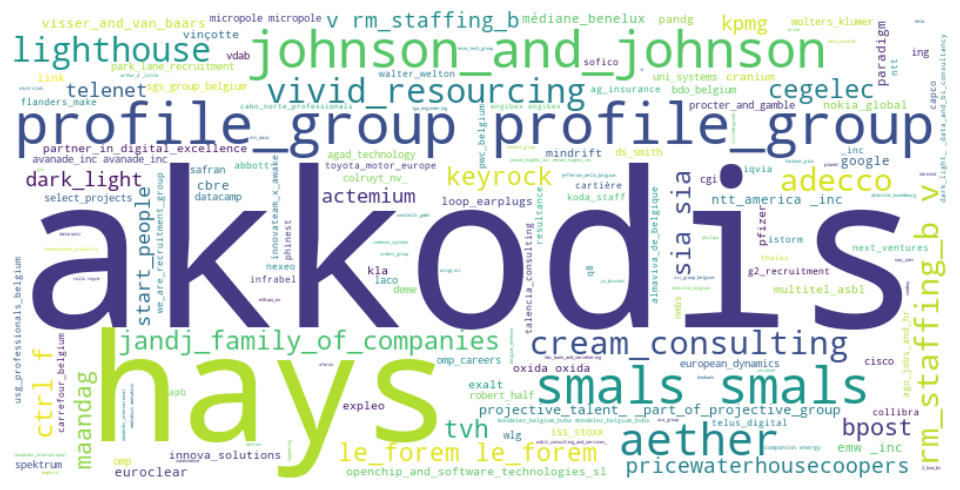

In [27]:
# make a word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# join all text into one string; adjust this if you already have a single string
companies = " ".join(filter_matches["company_name_clean"].dropna().astype(str))

wc = WordCloud(width=800, height=400, background_color="white",
               colormap="viridis", stopwords=None).generate(companies)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.show()


In [6]:
filter_matches.to_csv("/Users/vancescadinh/Documents/AI/ai-projects/tech-jobs-market-ai/tech-jobs-market-ai/ingestion/data-extraction/filtered_jobs.csv", index=False)